<a href="https://colab.research.google.com/github/AshvinVignesh/Spam-Mail-Detection/blob/main/SPAM_MAIL_CW_(DecisionTree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
headers = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_%3B','char_freq_%28','char_freq_%5B','char_freq_%21','char_freq_%24','char_freq_%23','capital_run_length_average','capital_run_length_longest','capital_run_length_total','class']

df = pd.read_csv('spambase.data', header=None, names=headers)

In [107]:
df.describe

<bound method NDFrame.describe of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32     

In [108]:
df = df.drop_duplicates()

In [109]:
df= df.dropna()
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [110]:
df.shape

(4210, 58)

**TRAIN SPLIT**

In [111]:
X = df.drop(columns=['class'])
y= df['class'].values

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [114]:
X = pd.DataFrame( data = scaled_data , columns =X.columns)

In [115]:
from sklearn.decomposition import PCA

In [116]:
pca = PCA(n_components=5)
principle_components =pca.fit_transform(X)

In [117]:
X = pd.DataFrame(data = principle_components, columns=['PC1', 'PC2','PC3','PC4','PC5'])
X.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.766904,0.050083,-0.638131,0.039002,-0.233738
1,-1.293574,2.006484,0.068183,-0.489847,-0.128777
2,-1.612741,4.821900,3.142117,-1.057630,1.616497
3,-0.857216,0.413653,-0.552053,-0.044556,-0.061385
4,-0.858070,0.412987,-0.554173,-0.044798,-0.061340


Text(0.5, 1.0, 'scree plot')

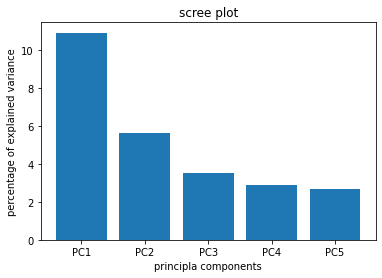

In [118]:
per_var =np.round(pca.explained_variance_ratio_ * 100 , decimals=1)
label = ['PC' + str(x) for x in range(1,len(per_var) + 1 )]
plt.bar(x=range(1,len(per_var)+1),height = per_var , tick_label = label)
plt.ylabel("percentage of explained variance")
plt.xlabel('principla components')
plt.title('scree plot')

In [119]:
# pca = PCA(n_components= 4)
# principle_components = pca.fit_transform(X)

In [120]:
# X = pd.DataFrame(data = principle_components, columns=['PC1', 'PC2','PC3','PC4'])


In [121]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [180]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 5 , random_state= 42)

In [181]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [182]:
from sklearn import tree


In [183]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_0 <= -0.63
|   |--- feature_1 <= 0.03
|   |   |--- feature_3 <= 0.00
|   |   |   |--- feature_1 <= -0.29
|   |   |   |   |--- feature_3 <= -0.02
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  -0.02
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -0.29
|   |   |   |   |--- feature_4 <= -0.40
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  -0.40
|   |   |   |   |   |--- class: 1
|   |   |--- feature_3 >  0.00
|   |   |   |--- feature_4 <= 0.16
|   |   |   |   |--- feature_3 <= 0.26
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  0.26
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.16
|   |   |   |   |--- feature_0 <= -0.94
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  -0.94
|   |   |   |   |   |--- class: 0
|   |--- feature_1 >  0.03
|   |   |--- feature_1 <= 1.08
|   |   |   |--- feature_3 <= -0.38
|   |   |   |   |--- feature_4 <= -0.78
|   |   |   |   |   |

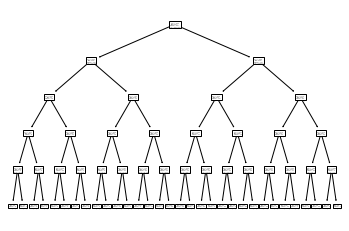

In [184]:
tree.plot_tree(dtree);

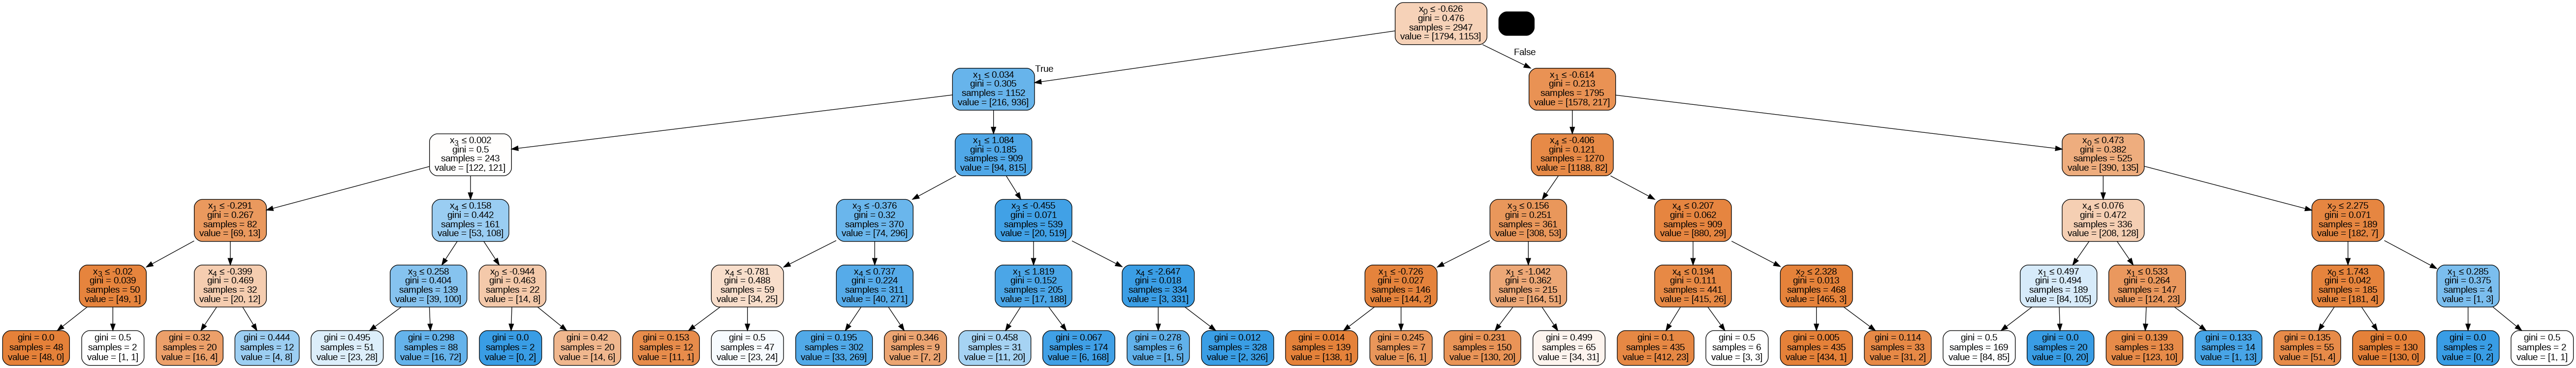

In [185]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [186]:
prediction = dtree.predict(X_test)

In [187]:
from sklearn.metrics import classification_report,confusion_matrix

In [188]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       737
           1       0.82      0.90      0.86       526

    accuracy                           0.87      1263
   macro avg       0.87      0.88      0.87      1263
weighted avg       0.88      0.87      0.88      1263



In [189]:
print(confusion_matrix(y_test,prediction))

[[633 104]
 [ 54 472]]


**ACCURACY**

In [190]:
from sklearn.metrics import accuracy_score

In [191]:
y_pred=dtree.predict(X_test)
acc =accuracy_score(y_test,y_pred)
print(acc*100)

87.49010292953285


Pre pruning 

In [192]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [193]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [194]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.9151679674244995
Test score 0.8796516231195566


post pruning

In [195]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 2.03596878e-04 2.03596878e-04 2.54496098e-04
 2.82773442e-04 2.90852683e-04 2.90852683e-04 2.96912114e-04
 2.96912114e-04 3.01625005e-04 3.08480118e-04 3.08480118e-04
 3.08480118e-04 3.11050786e-04 3.15090407e-04 3.16706255e-04
 3.16706255e-04 3.18120122e-04 3.18120122e-04 3.19367652e-04
 3.22361724e-04 3.22361724e-04 3.23099394e-04 3.23545427e-04
 3.27209269e-04 3.28382062e-04 3.28724126e-04 3.30627409e-04
 3.30844927e-04 3.31473312e-04 3.32541568e-04 3.32674638e-04
 3.34186795e-04 3.34679800e-04 3.34850193e-04 3.35639781e-04
 3.36096434e-04 3.36280273e-04 3.37053838e-04 3.38548066e-04
 3.39328130e-04 3.39328130e-04 3.39328130e-04 3.44879908e-04
 3.65478025e-04 3.80370676e-04 3.87803577e-04 3.90750191e-04
 4.05928717e-04 4.07193756e-04 4.21423646e-04 4.50913682e-04
 4.52437507e-04 4.52437507e-04 4.52437507e-04 4.52437507e-04
 4.52437507e-04 4.52437507e-04 4.52437507e-04 4.52437507e-04
 4.52437507e-04 4.52437507e-04 4.52437507e-04 4.82600008e-04
 4.84754472e-04 5.127145

In [196]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

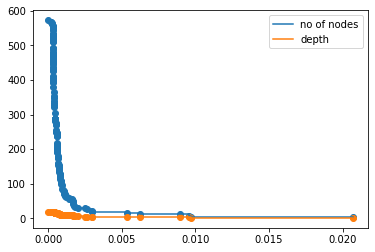

In [197]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

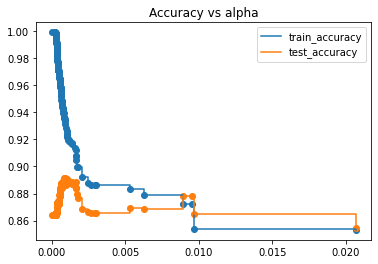

In [198]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [199]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.006)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.8832711231761113
Test score 0.8693586698337292


Ensemble Adaboost Classifier

In [200]:
from sklearn.ensemble import AdaBoostClassifier


In [209]:
model = AdaBoostClassifier(base_estimator=dtree, random_state=42)
model.fit(X_train, y_train)
y_pred_adaboost=model.predict(X_test)
print(f'Test score {accuracy_score(y_pred_adaboost,y_test)*100}')

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test score 88.91528107680126


Gradient Boosting Classifier

In [202]:
from sklearn.ensemble import GradientBoostingClassifier


In [203]:
model1= GradientBoostingClassifier(learning_rate=0.05,random_state=42)
model1.fit(X_train, y_train)
y_pred_GBM=model1.predict(X_test)
print(f'Test score {accuracy_score(y_pred_GBM,y_test)*100}')

Test score 89.86539984164688


XG BOOST

In [204]:
import xgboost as xgb


In [205]:
model2=xgb.XGBClassifier(random_state=42,learning_rate=0.05)
model2.fit(X_train, y_train)
y_pred_xgboost=model2.predict(X_test)
print(f'Test score {accuracy_score(y_pred_xgboost,y_test)*100}')

Test score 89.7070467141726
